In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('Advertising.csv',index_col=0)

In [ ]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


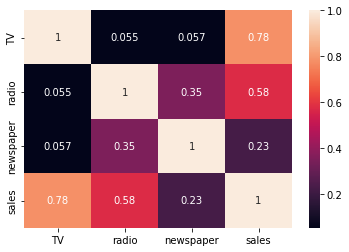

In [ ]:
sns.heatmap(data = data.corr(), annot=True)

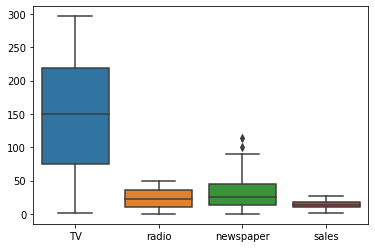

In [ ]:
sns.boxplot(data = data)

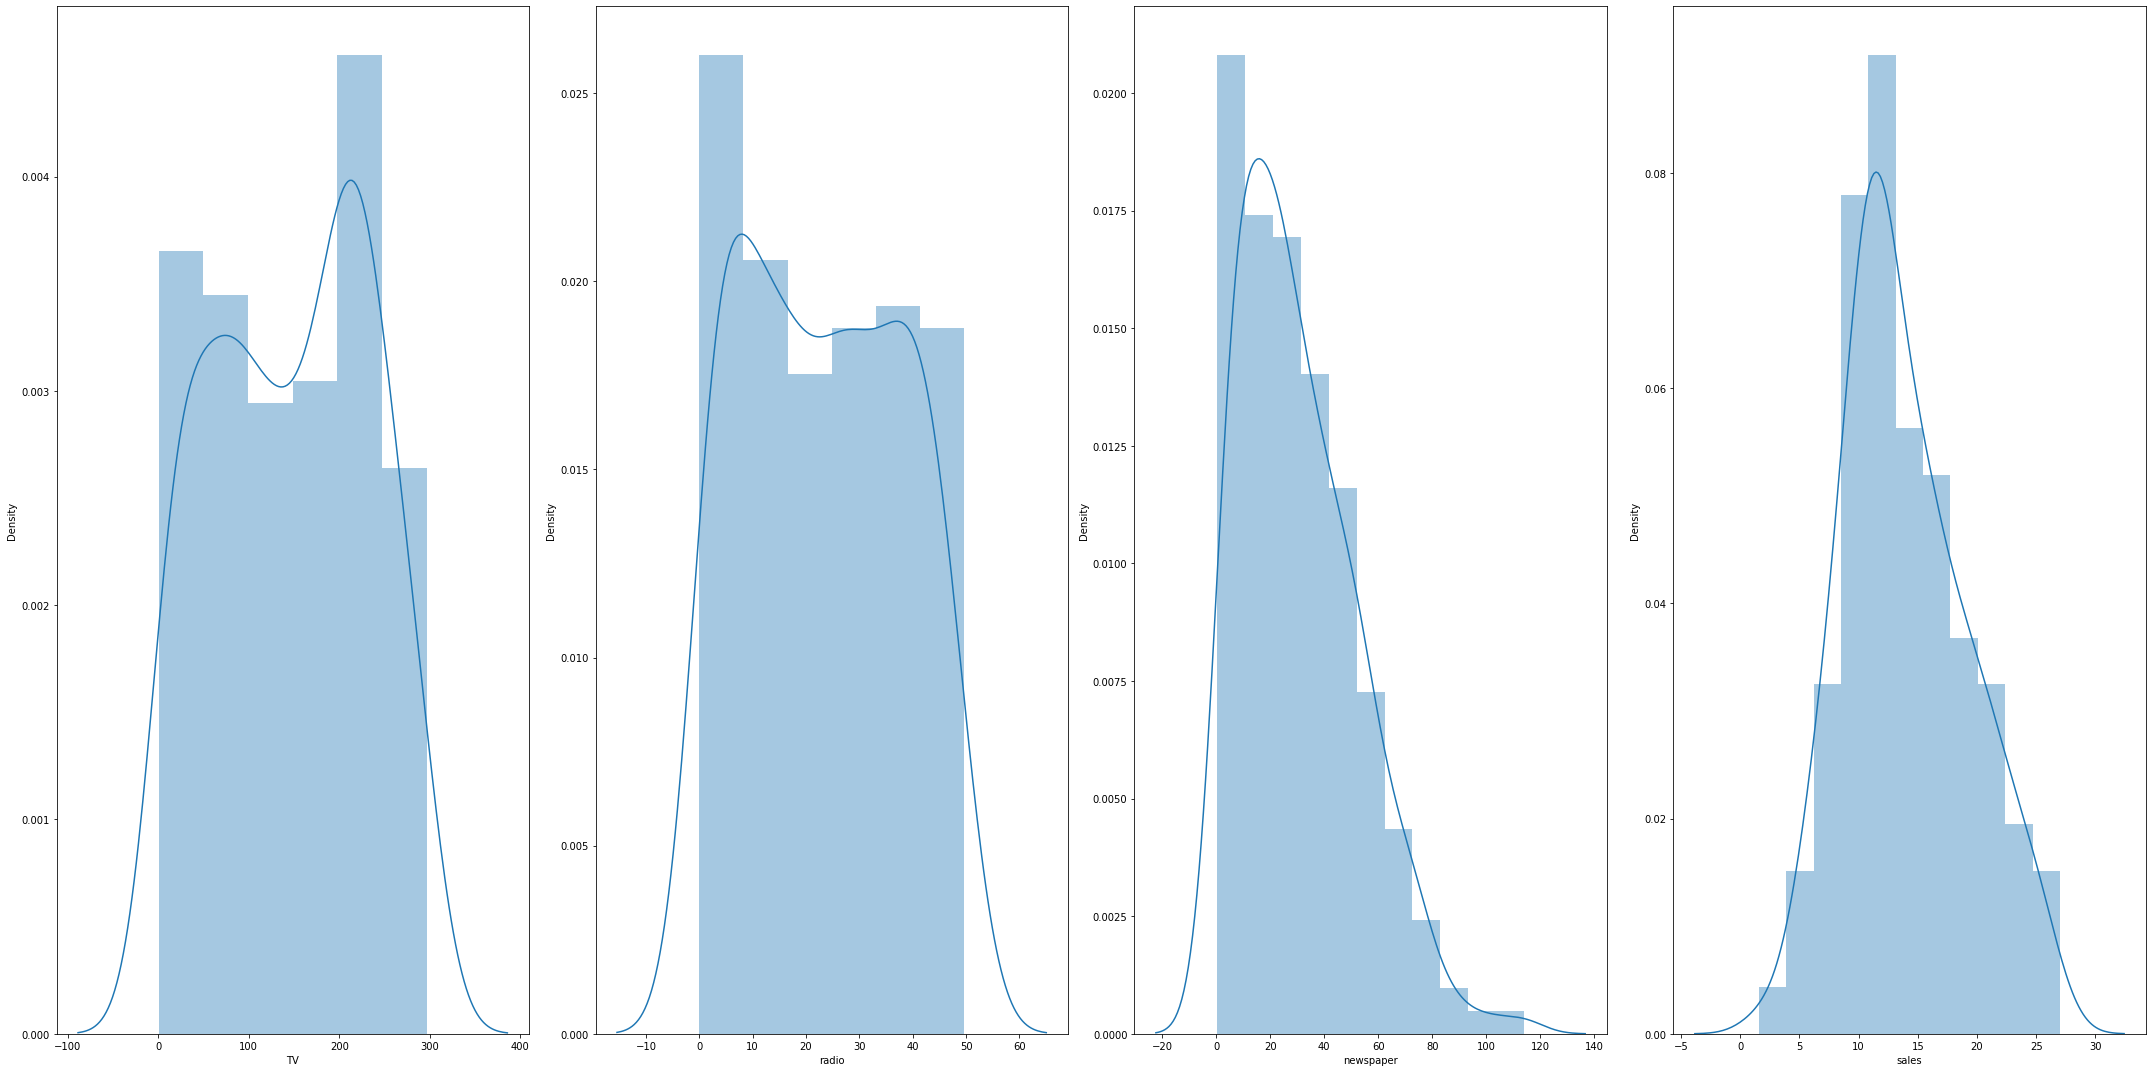

In [ ]:
fig, axes = plt.subplots(ncols=len(data.columns), figsize=(30,15))
for ax, col in zip(axes, data.columns):
  sns.distplot(data[col], ax=ax)
  plt.tight_layout() 
plt.show()

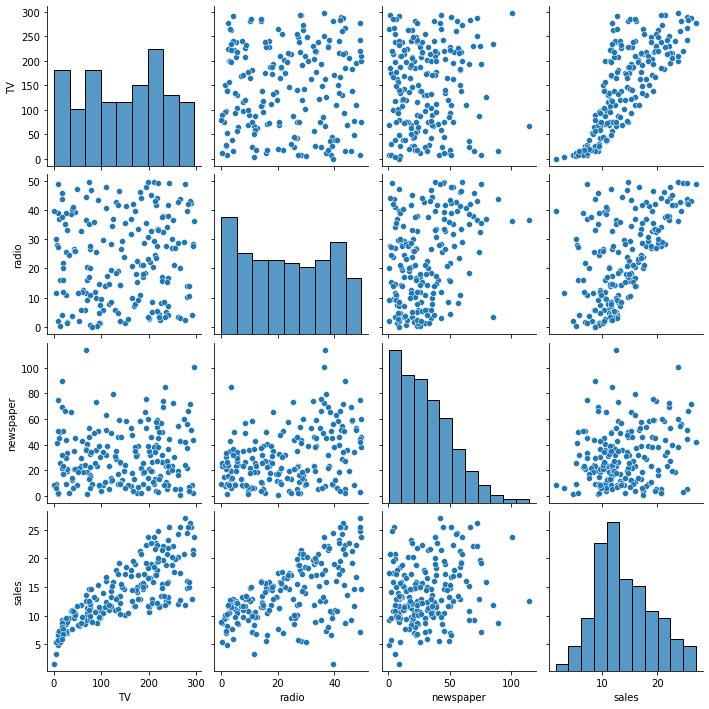

In [ ]:
sns.pairplot(data)

### Approach 1

In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
y=data['sales']

In [ ]:
x=data.drop(columns=['sales'])

In [ ]:
x1 = sm.add_constant(x)

In [ ]:
x1.head()

,const,TV,radio,newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4


In [ ]:
x1.describe().T

,count,mean,std,min,25%,50%,75%,max
const,200.0,1.0000,0.000000,1.0,1.000,1.00,1.000,1.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0


In [ ]:
model = OLS(y,x1).fit()

: 

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        04:27:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [ ]:
model2 = OLS(y, x1.drop('newspaper', axis=1)).fit()

In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           4.83e-98
Time:                        04:27:49   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

### Approach 2

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x,y)

LinearRegression()

In [ ]:
lr_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
lr_model.intercept_

2.938889369459412

In [ ]:
# r-squared
lr_model.score(x,y)

0.8972106381789522

In [ ]:
y_pred = lr_model.predict(x)

In [ ]:
data['y_pred'] = y_pred
data

,TV,radio,newspaper,sales,y_pred
1,230.1,37.8,69.2,22.1,20.523974
2,44.5,39.3,45.1,10.4,12.337855
3,17.2,45.9,69.3,9.3,12.307671
4,151.5,41.3,58.5,18.5,17.597830
5,180.8,10.8,58.4,12.9,13.188672
...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,5.370342
197,94.2,4.9,8.1,9.7,8.165312
198,177.0,9.3,6.4,12.8,12.785921
199,283.6,42.0,66.2,25.5,23.767321


In [ ]:
RMSE = sqrt(sum((y_pred - y)**2)/len(y))
RMSE

1.6685701407225697